In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype(int)

In [8]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [9]:
df.duplicated().sum()

0

In [10]:
X=df.drop(columns=['Exited'])
Y=df['Exited']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-09-08 06:15:14.560082: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757312114.772888      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757312114.835812      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
model=Sequential()

model.add(Dense(7,activation='relu',input_dim=11))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-08 06:15:27.970438: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112 (448.00 B)

 Trainable params: 112 (448.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
histroy=model.fit(X_train_scaled,Y_train,epochs=90,validation_split=0.2)

Epoch 1/90
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7891 - loss: 0.6366 - val_accuracy: 0.7987 - val_loss: 0.5043
Epoch 2/90
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7915 - loss: 0.5115 - val_accuracy: 0.7987 - val_loss: 0.4653
Epoch 3/90
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7960 - loss: 0.4606 - val_accuracy: 0.7987 - val_loss: 0.4482
Epoch 4/90
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.4594 - val_accuracy: 0.7987 - val_loss: 0.4389
Epoch 5/90
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.4499 - val_accuracy: 0.7987 - val_loss: 0.4335
Epoch 6/90
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.4481 - val_accuracy: 0.7987 - val_loss: 0.4298
Epoch 7/90
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.4324 - val_accuracy: 0.7987 - val_loss: 0.4267
Epoch 8/90
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.4397 - val_accuracy: 0.

In [18]:
model.layers[0].get_weights()

[array([[ 2.91464720e-02,  4.30041105e-02, -7.13134417e-03,
         -3.00866142e-02,  1.56287402e-01,  3.49265896e-02,
          7.61606097e-02],
        [ 1.65806189e-01, -3.07983230e-03, -5.05927026e-01,
         -1.36139572e-01, -9.16672349e-01,  9.33588862e-01,
         -2.25226238e-01],
        [ 1.38613537e-01,  7.95797408e-02, -6.75766096e-02,
          2.01906607e-01, -3.60986918e-01,  1.58344060e-01,
          4.40493971e-02],
        [ 1.27153933e-01, -4.22306985e-01, -3.09672691e-02,
          1.62532270e-01, -3.06235075e-01, -4.45270628e-01,
         -4.54212546e-01],
        [-6.25190914e-01, -1.60985589e+00, -4.97667253e-01,
         -4.16161537e-01, -2.15617627e-01, -7.56272733e-01,
         -5.64247966e-01],
        [ 6.86355457e-02,  1.01337703e-02, -2.39369329e-02,
         -2.34515771e-01,  1.10172786e-01,  1.39568187e-03,
          5.79785593e-02],
        [ 8.43614280e-01,  9.64089632e-02, -2.12128103e-01,
         -6.71999574e-01,  4.30669367e-01,  3.45652759e-01

In [19]:
model.layers[1].get_weights()

[array([[ 0.44167072,  0.25864023,  0.38288194],
        [-1.003609  , -0.76324505, -0.5014272 ],
        [ 0.7892581 ,  0.5732766 ,  0.5620563 ],
        [-0.01345343,  0.48890644, -0.7036055 ],
        [ 0.5592403 , -0.4452646 , -1.325945  ],
        [ 0.2533098 , -0.5078536 ,  0.97982216],
        [ 0.6352404 ,  0.89708567, -0.6318817 ]], dtype=float32),
 array([-2.0226398e-04, -1.4814911e-03, -3.4559080e-01], dtype=float32)]

In [20]:
Y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [21]:
Y_pred=np.where(Y_log>0.5,1,0)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8655

In [23]:
import matplotlib.pyplot as plt

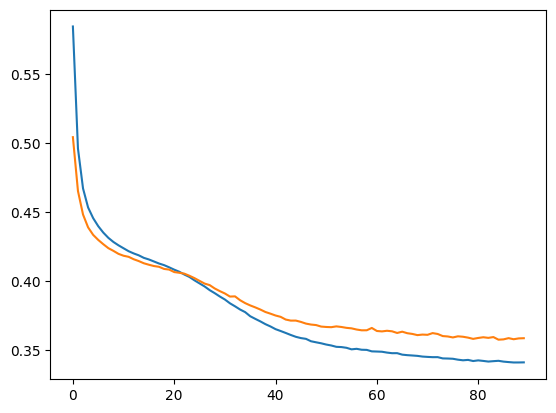

In [24]:
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])